<a href="https://colab.research.google.com/github/financieras/math_for_ai/blob/main/articulos/linear_regression_from_scratch_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression from Scratch with Python: OLS Explained

Linear regression is the fundamental algorithm in Data Science, and in this article you'll learn how to build it from scratch. We combine accessible theory with practical code so you understand **why it works** and **how to implement it** step by step.

By the end of this article, you'll have a working and visualized linear regression model, ready to make predictions.

---


# **1. Introduction**

In Machine Learning, it's recommended to start by programming a linear regression algorithm, since besides being educational, it continues to be used at the enterprise level in Data Science. But why does it remain so relevant in the age of chatbots and neural networks?

The answer is simple: **effectiveness and interpretability**. While more complex models can act as "black boxes," linear regression allows us to understand exactly how each variable affects our outcome. It's our natural starting point for any numerical prediction problem.

## What problem does it really solve?

Imagine you have historical data on housing prices and want to predict how much a new housing will cost. You have variables like square meters, number of rooms, location... Linear regression lets you find a mathematical relationship between these features and the price.

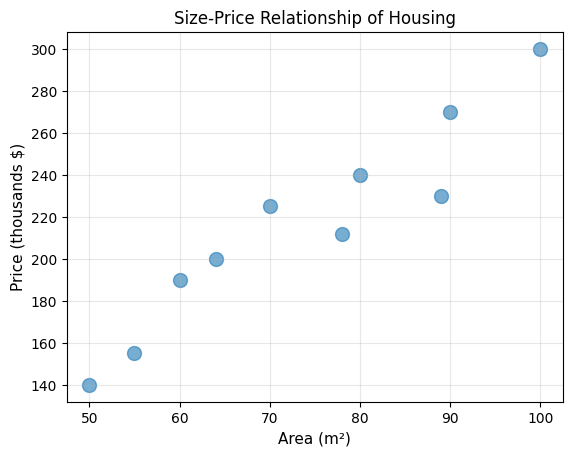

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Example data: housing size vs price
area = np.array([50, 55, 60, 64, 70, 78, 80, 89, 90, 100])
price = np.array([140000, 155000, 190000, 200000, 225000,
                  212000, 240000, 230000, 270000, 300000])

plt.scatter(area, price/1000, alpha=0.6, s=100)
plt.xlabel('Area (m²)', fontsize=11)
plt.ylabel('Price (thousands $)', fontsize=11)
plt.title('Size-Price Relationship of Housing', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

The **least squares method** (Ordinary Least Squares, OLS) solves a seemingly simple problem: given a cloud of points, we want to find the line (or hyperplane) that best fits the data. "Best" here means minimizing the sum of squared errors between predictions and actual values.

# **2. General Formulation of the Regression Problem**

Now that we understand why linear regression is so useful, let's formalize the problem mathematically. We'll start with the simplest case of a single variable ($x$) to build intuition before generalizing to the multivariate case.

**Note on Notation.** Our conventions:
- we use **$m$** to denote the total number of training examples (observations)
- while **$n$** represents the number of features (independent variables)


## Simple case: one independent variable

Let's start with the basics. When we have only one predictor variable $x$, we want to find the line that best fits our data:

$$
\begin{array}{lcl}
y = w_0 + w_1 x + e         & \longrightarrow & \text{true model with error} \\
\hat{y} = w_0 + w_1 x       & \longrightarrow & \text{estimated model}
\end{array}
$$

Where:
- $\hat{y}$ → the **predicted value** by the model, the estimated $y$ (price)
- $x$ → predictor variable (area)
- $w_0$ → **intercept** (independent term or bias)
- $w_1$ → **slope** (coefficient of the variable)
- $e$ → **error or residual**: the difference between the actual value and what the model predicts

The error of each prediction is:

\begin{align*}
e_i &= y_i - \hat{y}_i \\
e_i &= y_i - (w_0 + w_1 x_i)
\end{align*}


Our goal is to find $w_0$ and $w_1$ that minimize these errors.

## The Least Squares Method

Instead of using the errors directly, we work with **squared errors**. We define the cost function:

$$J(w_0, w_1) = \sum_{i=1}^{m} e_i^2 = \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{m} [y_i - (w_0 + w_1 x_i)]^2$$

**Why squared?** For three main reasons:
- Prevents positive and negative errors from canceling out
- Penalizes large errors more (which is usually desirable)
- We obtain a differentiable and convex function, which makes finding the minimum easier

### The Mean Squared Error (MSE)

The function $J(w)$ simply sums the squared errors, but if we calculate the mean we'll have obtained the Mean Squared Error (MSE).

$$\text{MSE}(w) = \frac{1}{m} \sum_{i=1}^{m}e_i^2 = \frac{1}{m} \sum_{i=1}^{m}(y_i - \hat{y}_i)^2 = \frac{1}{m} \sum_{i=1}^{m}(y_i - (w_0 + w_1 x_i))^2$$

### Visualization of Errors

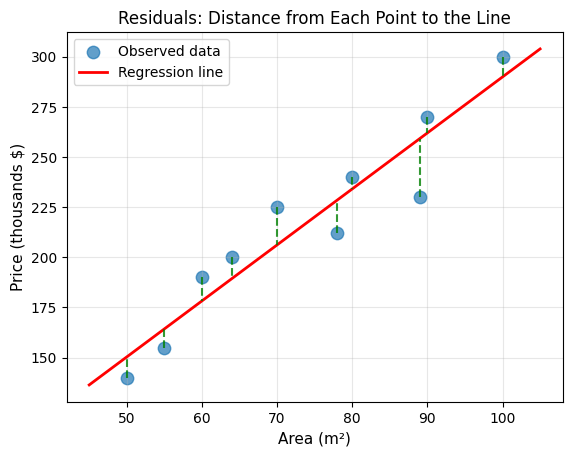

In [2]:
plt.scatter(area, price/1000, alpha=0.7, s=80, label='Observed data')

# First we calculate the coefficients for the line
X = np.column_stack([np.ones(len(area)), area])  # add column of 1s for bias

# Apply formula: w = (X^T X)^-1 X^T y
w = np.linalg.inv(X.T @ X) @ X.T @ price


# Regression line
area_range = np.linspace(45, 105, 100)
price_range = w[0] + w[1] * area_range
plt.plot(area_range, price_range/1000, 'r-', linewidth=2, label='Regression line')

# Vertical lines showing the errors
for xi, yi in zip(area, price):
    yi_pred = w[0] + w[1] * xi
    plt.plot([xi, xi], [yi/1000, yi_pred/1000], 'g--', alpha=0.8)

plt.xlabel('Area (m²)', fontsize=11)
plt.ylabel('Price (thousands $)', fontsize=11)
plt.title('Residuals: Distance from Each Point to the Line', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

The green dashed lines represent the **residuals** or errors: the vertical distance from each point to the regression line. The least squares method finds the line that makes the sum of the squares of these distances (green lines) as small as possible.

### Minimizing the error

The method finds the optimal values by taking derivatives and setting them equal to zero:

$$\frac{\partial J}{\partial w_0} = 0 \quad \text{and} \quad \frac{\partial J}{\partial w_1} = 0$$

Solving this system of equations yields the **normal equations**:

$$
\begin{align*}
w_1 &= \frac{n\sum x_i y_i - \sum x_i \sum y_i}{n\sum x_i^2 - (\sum x_i)^2} \\[10pt]
w_0 &= \bar{y} - w_1 \bar{x}
\end{align*}
$$

Where $\bar{x}$ and $\bar{y}$ are the means of $x$ and $y$ respectively.

### The strength of the linear relationship: the correlation coefficient $r$

To evaluate our model, it's useful to ask ourselves: **to what extent are $x$ and $y$ linearly related?**

The **linear correlation coefficient $r$** measures precisely that: the **strength and direction** of the linear relationship between two variables. Its value is always between $-1$ and $1$:
- $r = 1$: perfect positive linear relationship (as $x$ increases, $y$ increases proportionally)
- $r = -1$: perfect negative linear relationship
- $r = 0$: no linear relationship
- $|r|$ close to 1 → strong relationship
- $|r|$ close to 0 → weak relationship

In linear regression, the linear correlation coefficient $r$ is defined as the quotient between the covariance of the two variables and the product of their standard deviations. Covariance measures how the two variables vary together.

Mathematically,

$$
r = \frac{\mathrm{Cov}(X,Y)}{\sigma_X \sigma_Y}
$$

Expanding the formula we obtain:

$$
r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2} \cdot \sqrt{\sum_{i=1}^{n} (y_i - \bar{y})^2}}
$$

> **Intuitive note**: The numerator measures how the deviations of $x$ and $y$ from their means move together. If they always go up or down together, $r$ will be high. If not, they cancel out and $r$ will be low. Then it's divided by the product of the deviations to standardize between -1 and 1.

This $r$ is especially useful **before fitting the model**: if $|r|$ is very low, we already know that a straight line won't capture the relationship between the variables well.

These formulas work perfectly for one independent variable $X$, but what happens when we have multiple features? This is where matrix notation becomes indispensable.

## Generalization to multiple variables: matrix notation

When we have multiple predictor variables $(x_1, x_2, \dots, x_n)$, the model extends naturally. Instead of a line, we now seek a **hyperplane**:

$$\hat{y} = w_0 + w_1 x_1 + w_2 x_2 + \dots + w_n x_n$$

This is where **matrix notation** makes life easier. We represent our data as:

$$\mathbf{X} = \begin{bmatrix}
1 & x_{11} & x_{12} & \dots & x_{1n} \\
1 & x_{21} & x_{22} & \dots & x_{2n} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{m1} & x_{m2} & \dots & x_{mn}
\end{bmatrix}, \quad
\mathbf{w} = \begin{bmatrix}
w_0 \\
w_1 \\
\vdots \\
w_n
\end{bmatrix}, \quad
\mathbf{y} = \begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_m
\end{bmatrix}$$

**Watch out for the column of ones!** It's crucial to include it in $\mathbf{X}$ to represent the independent term $w_0$.

Our model is elegantly written as:

$$\hat{\mathbf{y}} = \mathbf{X} \mathbf{w}$$

And the optimal solution is given by the **normal equations** in matrix form:

$$\boxed{\mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}}$$

This formula gives us the optimal coefficients directly without needing to iterate. It's like having the answer to an optimization problem without having to search for it!

**Why is this notation so powerful?** Because it allows us to treat simple and complex cases with the same mathematical framework, and because matrix operations are computationally efficient in NumPy.

---

# **3. Implementation with Least Squares**

## From theory to practice

We proceed to implement the least squares solution from scratch, applying the theoretical concepts developed previously to our housing price dataset.

The matrix formulation we derived:

$$\mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$$

Is efficiently implemented using matrix operations in NumPy.

## Construction of the design matrix

Proper implementation requires including a column of ones for the independent term:

In [3]:
# We use the price and area data from the initial example

# Matrix X with column of ones for the intercept
X = np.column_stack([np.ones(len(area)), area])
y = price

print("Design matrix X:")
print(X)
print(f"\nDimensions: {X.shape} - {X.shape[0]} observations, {X.shape[1]} features")

Design matrix X:
[[  1.  50.]
 [  1.  55.]
 [  1.  60.]
 [  1.  64.]
 [  1.  70.]
 [  1.  78.]
 [  1.  80.]
 [  1.  89.]
 [  1.  90.]
 [  1. 100.]]

Dimensions: (10, 2) - 10 observations, 2 features


## Algorithm implementation
Now that we understand the theory, let's implement the matrix expression in code.

In [4]:
def ordinary_least_squares(X, y):
    """Calculates optimal coefficients using ordinary least squares"""
    return np.linalg.inv(X.T @ X) @ X.T @ y

# Calculation of coefficients
w = ordinary_least_squares(X, y)

print("Model coefficients:")
print(f"w_0 (intercept): ${w[0]:.2f}")
print(f"w_1 (slope): ${w[1]:.2f} /m²")

Model coefficients:
w_0 (intercept): $10722.85
w_1 (slope): $2791.81 /m²


**Coefficient interpretation:**
- **Slope (\$2,791.81 /m²)**: For each additional square meter, the price increases approximately \$2,792
- **Intercept (\$10,722.85)**: Represents the base value of the housing (when area is 0 m²)

## Visualization of the fit

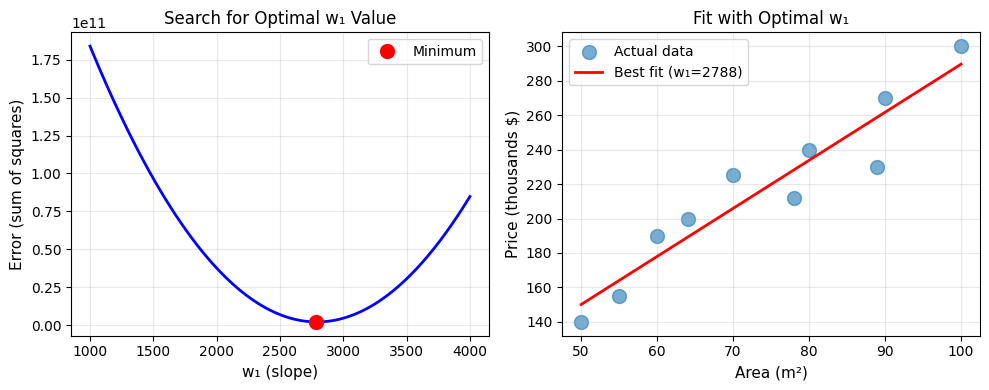


- Optimal w₁ found: $2787.88 /m²
- Minimum SSE (Sum of Squared Errors): 2.12e+09
	Which corresponds to MSE: 2.12e+08


In [5]:
#Let's see it graphically with our housing data:
# Visualization of how error varies with different values of w1
def calculate_error(w0, w1, x, y):
    y_pred = w0 + w1 * x
    return np.sum((y - y_pred)**2)

# Calculate error for different values of w1
w1_vals = np.linspace(1000, 4000, 100)
w0_fixed = w[0]  # Once the optimal value of w_0 is known, we set it.
errors = [calculate_error(w0_fixed, w1, area, price) for w1 in w1_vals]

plt.figure(figsize=(10, 4))

# Error vs w1 plot
plt.subplot(1, 2, 1)
plt.plot(w1_vals, errors, 'b-', linewidth=2)
min_idx = np.argmin(errors)
plt.plot(w1_vals[min_idx], errors[min_idx], 'ro', markersize=10, label='Minimum')
plt.xlabel('w₁ (slope)', fontsize=11)
plt.ylabel('Error (sum of squares)', fontsize=11)
plt.title('Search for Optimal w₁ Value', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Plot with best fit
plt.subplot(1, 2, 2)
best_w1 = w1_vals[min_idx]
y_pred = w0_fixed + best_w1 * area
plt.scatter(area, price/1000, alpha=0.6, s=100, label='Actual data')
plt.plot(area, y_pred/1000, 'r-', linewidth=2, label=f'Best fit (w₁={best_w1:.0f})')
plt.xlabel('Area (m²)', fontsize=11)
plt.ylabel('Price (thousands $)', fontsize=11)
plt.title('Fit with Optimal w₁', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n- Optimal w₁ found: ${best_w1:.2f} /m²")
print(f"- Minimum SSE (Sum of Squared Errors): {errors[min_idx]:.2e}")
print(f"\tWhich corresponds to MSE: {errors[min_idx]/len(area):.2e}")

> **Understanding the Graph**  
> The plot on the left visualizes the **Cost Function**.
- It shows how the Mean Squared Error (MSE) changes as we vary the slope ($w_1$).
- Notice the "U" shape (convexity): this confirms there is a single global minimum.
- The red dot represents the specific value calculated by our OLS formula, proving that the mathematical method successfully finds the exact bottom of the error valley without needing to test all possibilities.

### Comparison of methods

In [6]:
print(f"\nComparison of methods:")
print(f"- Least squares (exact solution): ${w[1]:.2f} /m²")
print(f"- Grid search (limited resolution): ${best_w1:.2f} /m²")
print(f"- Difference: ${abs(w[1] - best_w1):.2f} /m² ({100*abs(w[1]-best_w1)/w[1]:.2f}%)")
print(f"\nThe small difference is due to:")
print(f"1. The grid search uses only 100 values between 1000 and 4000")
print(f"2. The real minimum (2791.81) falls between grid points")
print(f"3. With more points or interpolation, they would match exactly")


Comparison of methods:
- Least squares (exact solution): $2791.81 /m²
- Grid search (limited resolution): $2787.88 /m²
- Difference: $3.93 /m² (0.14%)

The small difference is due to:
1. The grid search uses only 100 values between 1000 and 4000
2. The real minimum (2791.81) falls between grid points
3. With more points or interpolation, they would match exactly


### Model Regression Line
We have successfully calculated the optimal coefficients ($\mathbf{w_0}$ and $\mathbf{w_1}$) using **our implementation** of the OLS method. The resulting equation is the **best-fit linear model** for the data. Let's visualize the final regression line against our dataset to see the model's performance.

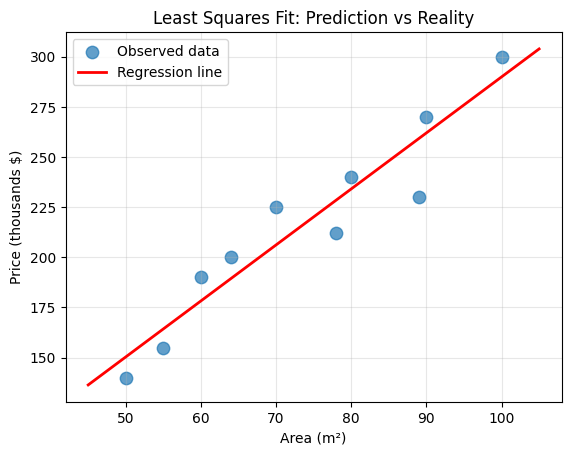

In [7]:
# Model predictions
predicted_price = X @ w

# Visualization
plt.scatter(area, price/1000, alpha=0.7, s=80, label='Observed data')

# Regression line
area_range = np.linspace(45, 105, 100)
price_range = w[0] + w[1] * area_range
plt.plot(area_range, price_range/1000, 'r-', linewidth=2,
         label='Regression line')

plt.xlabel('Area (m²)')
plt.ylabel('Price (thousands $)')
plt.title('Least Squares Fit: Prediction vs Reality')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

---

## Summary

We have successfully implemented a linear regression model from scratch using the least squares method. You now have:

- A model that predicts prices based on area
- Clear visualization of the fit to the data
- Understanding of the matrix formulation

**What's next?** Our model makes predictions, but how do you know if they're good? When should you use this method and when not? How does it compare with professional implementations?

These critical questions are answered in the next article, where we'll evaluate the model's performance and explore its advantages, limitations, and appropriate use cases.

#### Blog Tags

```txt
#Python
#DataScience
#MachineLearning
#LinearRegression
#OLS
#NumPy
#DataAnalysis
#Statistics
#Coding
#Tutorial
#DataVisualization
```